In [1]:
# import pandas as pd
# import mglearn
# from mglearn import make_blobs
# import preamble
from preamble import *

In [2]:
pd.__version__

'2.2.2'

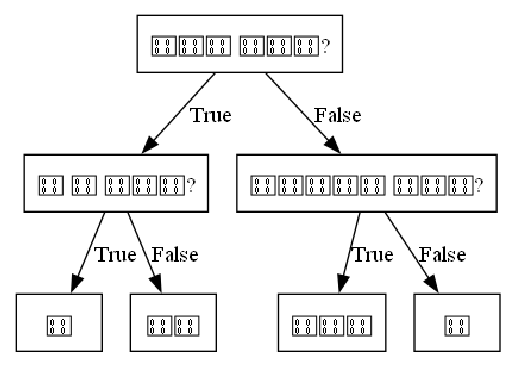

In [3]:
#TODO: 한국어 깨짐
mglearn.plots.plot_animal_tree()


##결정트리
-장점: 전처리에 민감하지 않음
-단점: 과대적합에 취약

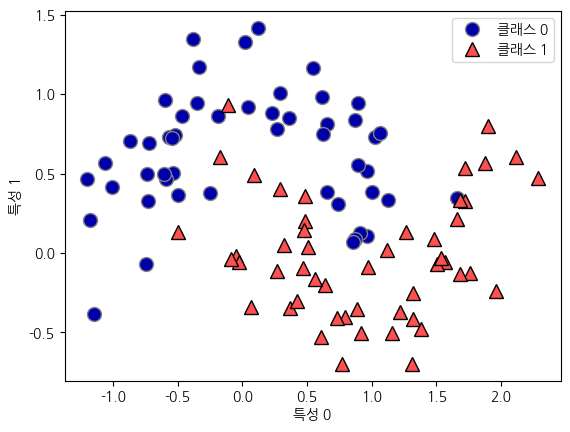

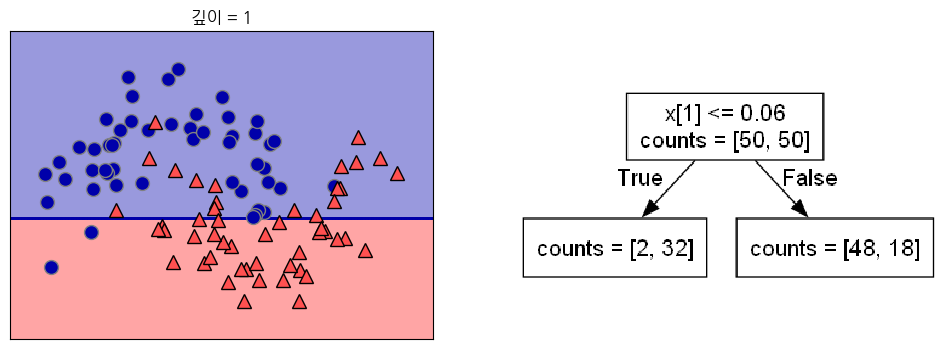

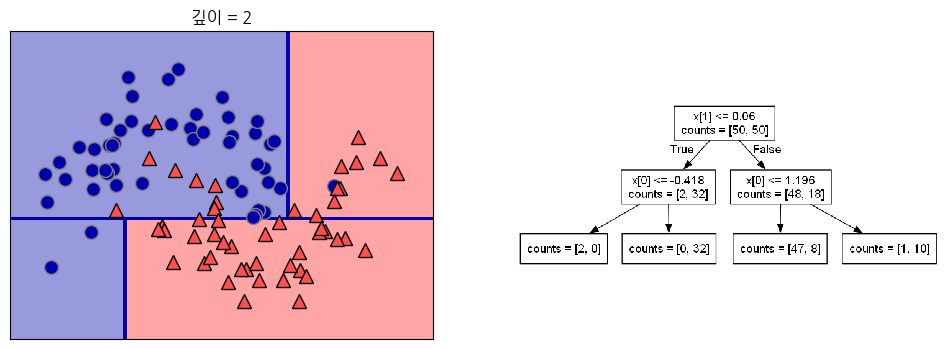

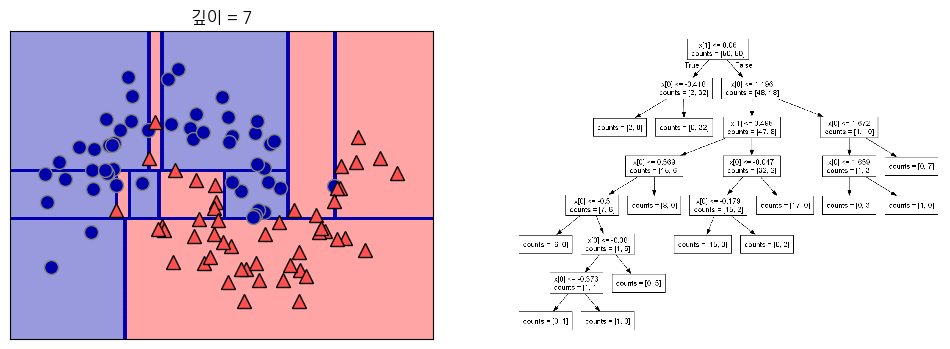

In [4]:
##결정트리 시각화
mglearn.plots.plot_tree_progressive()

##일반적인 결정트리

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,stratify=cancer.target, random_state=42)
##stratify : 데이어를 균등한 비율로 선택되게 나눔 -> 과대적합 낮춤
tree = DecisionTreeClassifier(max_depth = 4 , random_state=42)
tree.fit(X_train, y_train)
print(tree.score(X_train,y_train), tree.score(X_test,y_test))

0.9882629107981221 0.9440559440559441


In [6]:
cancer("target")

TypeError: 'Bunch' object is not callable

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["악성" ,"약성"], feature_names=cancer.feature_names , impurity=False, filled=True)

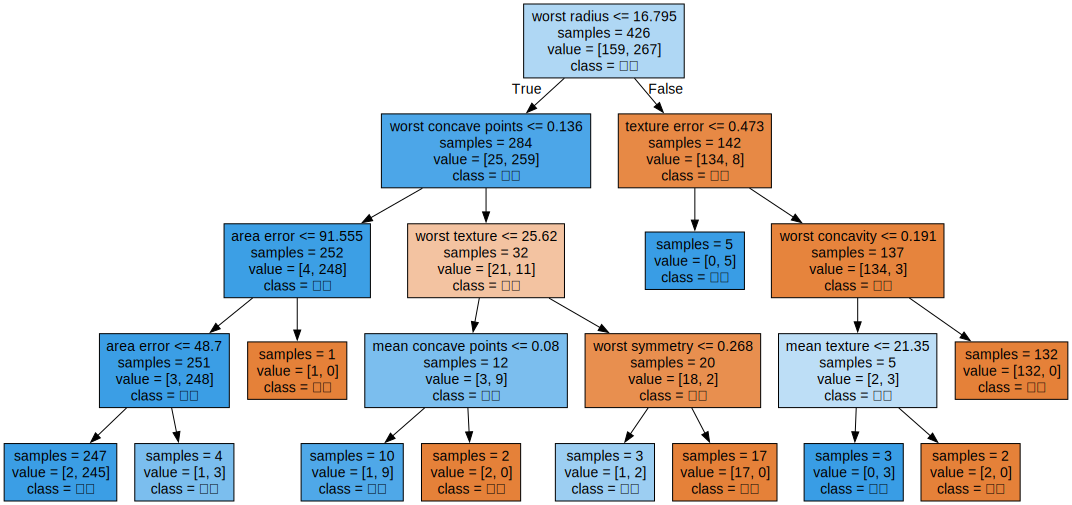

In [ ]:
import graphviz

with open("tree.dot",encoding="utf-8") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

특성 중요도

In [ ]:
def plot_feat_importances(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel('특성중요도')
    plt.ylabel('특성')
    plt.ylim(-1, n_features)

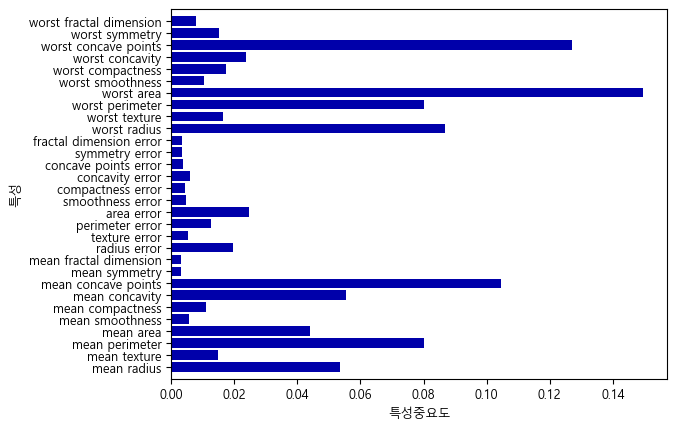

In [ ]:
plot_feat_importances(forest)

랜덤 포레스트

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,stratify=cancer.target, random_state=42)
##stratify : 데이어를 균등한 비율로 선택되게 나눔 -> 과대적합 낮춤
forest = RandomForestClassifier(n_estimators=100,random_state=42)
forest.fit(X_train, y_train)
print(forest.score(X_train,y_train), forest.score(X_test,y_test))

1.0 0.958041958041958


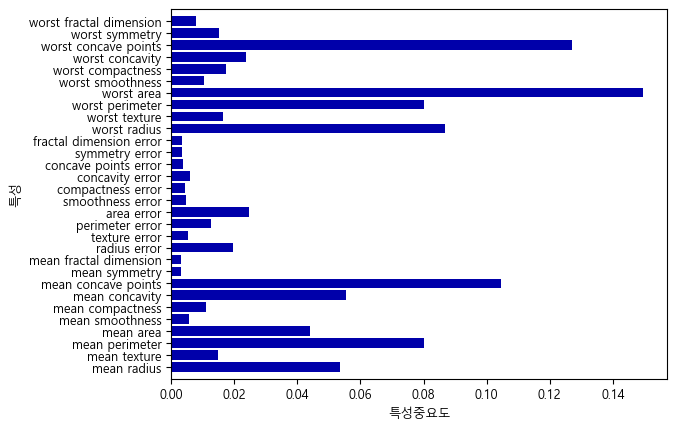

In [ ]:
plot_feat_importances(forest)

결정트리 : 주요특징 파악
랜덤 포레스트 : 데이터 분류/회귀

In [ ]:
from sklearn.tree import export_graphviz
#예측기 1개를 선택
#forest 전체값으로 변경
estimator = forest.estimators_[3]
export_graphviz(estimator, out_file="forest.dot", class_names=["악성" ,"약성"], feature_names=cancer.feature_names , impurity=False, filled=True)

In [8]:
for tree in forest.estimator_:
    export_tree = export_graphviz(tree, out_file=None, feature_names=cancer.feature_names ,special_characters=True, rotate=True, precision=1, filled=True)



NameError: name 'forest' is not defined

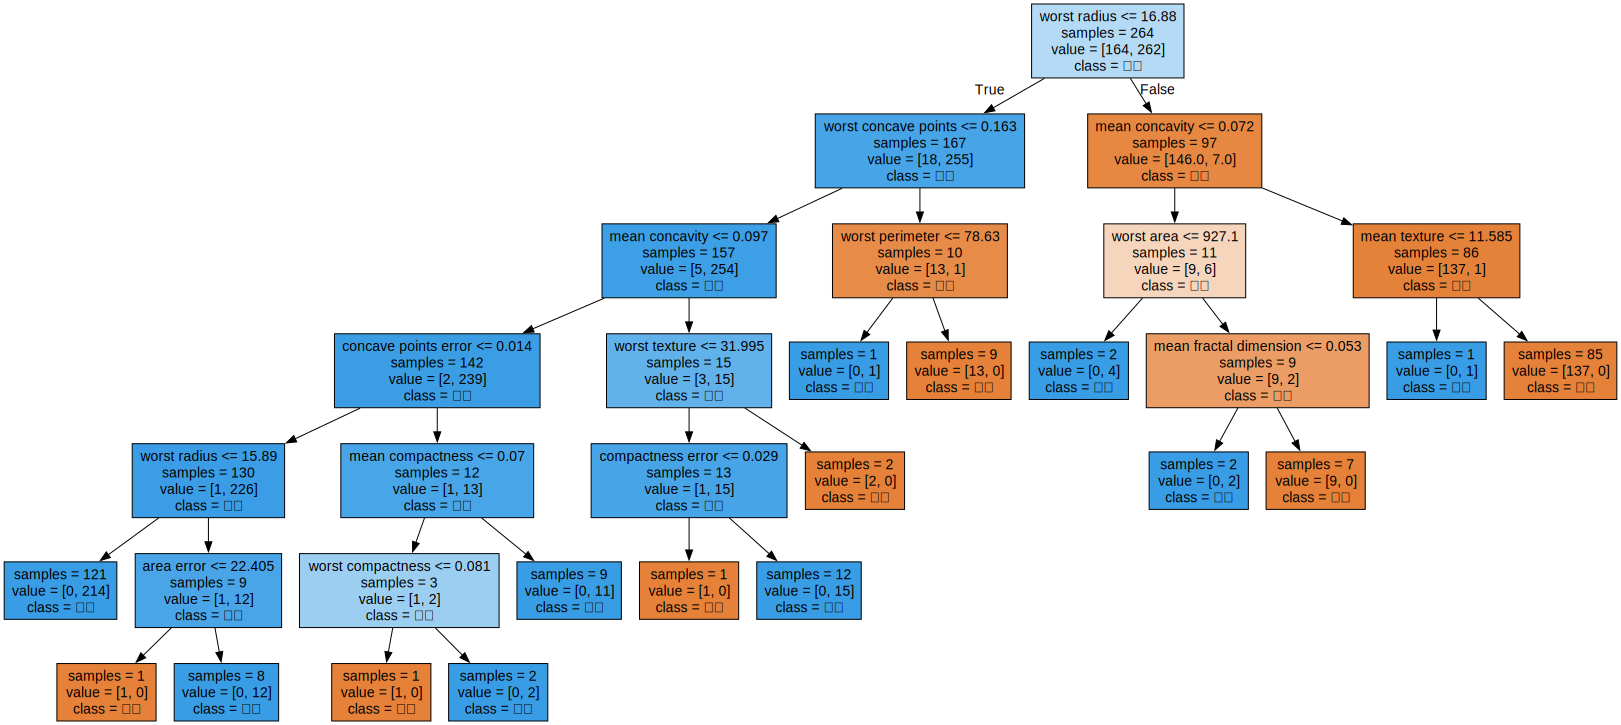

In [ ]:
import graphviz

with open("forest.dot",encoding="utf-8") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

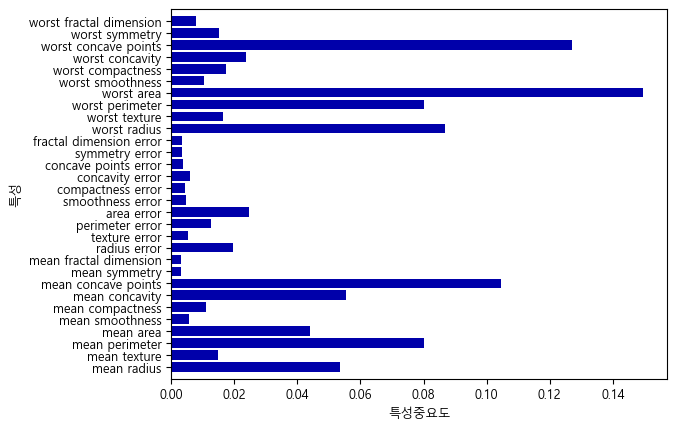

In [ ]:
plot_feat_importances(forest)

##예제

In [ ]:
ram_prices = pd.read_csv("data/ram_price.csv")
ram_prices.head()

,Unnamed: 0,date,price
0,0,1957.0,4.11e+08
1,1,1959.0,6.79e+07
2,2,1960.0,5.24e+06
3,3,1965.0,2.64e+06
4,4,1970.0,7.34e+05


Text(0, 0.5, '가격 ($/Mbyte)')

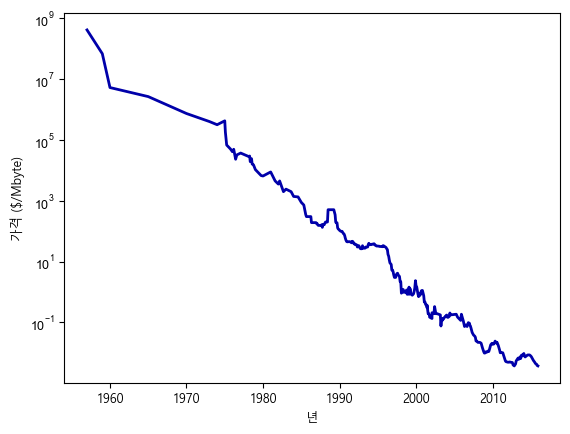

In [ ]:
import mglearn.datasets
import os
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))
plt.yticks(fontname="Arial")
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("년")
plt.ylabel("가격 ($/Mbyte)")

데이터 준비

In [ ]:
from sklearn.tree import DecisionTreeClassifier
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

In [ ]:
X_train = data_train.date.to_numpy()[:, np.newaxis]
y_train = np.log(data_train.price)

학습

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
tree = DecisionTreeClassifier().fit(X_train, y_train)
reg = LinearRegression().fit(X_train, y_train)
rfc = RandomForestClassifier().fit(X_train, y_train)

X_all = ram_prices.date.to_numpy()[:,np.newaxis]
pred_tree = tree.predict(X_all)
pred_reg = reg.predict(X_all)
pred_forest=rfc.predict(X_all)

price_tree=np.exp(pred_tree)
price_reg=np.exp(pred_reg)
price_forest=np.exp(pred_forest)

plt.figure(figsize=(12,5))
plt.yticks(fontname="Arial")
plt.semilogy(data_train.date, data_train.price, label="훈련 데이터")
plt.semilogy(data_test.date, data_test.price, label="테스트 데이터")
plt.semilogy(ram_prices.date, price_tree, label="트리 예측")
plt.semilogy(ram_prices.date, price_reg, label="선형회귀 예측")
plt.semilogy(ram_prices.date, price_forest, label="앙상블 예측")
plt.legend()

NameError: name 'X_train' is not defined